### Binary Variables

In [1]:
%%capture

%run '../lib/libraries.ipynb'
from ..lib import utilities as util
import pandas as pd

In [2]:
filterDf  = util.load_df('filterDf')
descDf = util.load_df('descDf')
types = util.get_var_types()

#### Variable List

In [3]:
util.variable_types(descDf, 'Categorical Binary')

,category,variable
0,Assignment (a),assignment_late_submission
1,Assignment (a),is_affecting_grade
2,Assignment Attempt (aa),is_force_scored
3,Assignment Attempt (aa),is_manual_scoring_required
4,Item (i),item_is_offline_scored
5,Item Attempt (ia),is_deleted


#### Counts

In [4]:
# Categorical / Nominal Values
for f in types['binaryVars']:
  filterDf.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

+--------------------------+-----+
|assignment_late_submission|count|
+--------------------------+-----+
|false                     |64838|
+--------------------------+-----+

+------------------+-----+
|is_affecting_grade|count|
+------------------+-----+
|true              |63243|
|false             |1595 |
+------------------+-----+

+----------+-----+
|is_deleted|count|
+----------+-----+
|false     |64838|
+----------+-----+

+---------------+-----+
|is_force_scored|count|
+---------------+-----+
|false          |63101|
|true           |1737 |
+---------------+-----+

+--------------------------+-----+
|is_manual_scoring_required|count|
+--------------------------+-----+
|false                     |64837|
|true                      |1    |
+--------------------------+-----+

+----------------------+-----+
|item_is_offline_scored|count|
+----------------------+-----+
|false                 |64838|
+----------------------+-----+



Variables With Unary Values
- assignment_late_submission
- is_deleted
- item_is_offline_scored
- is_manual_scoring_required has only one true value
- Unary variables will not be used

#### Correlations Heatmap

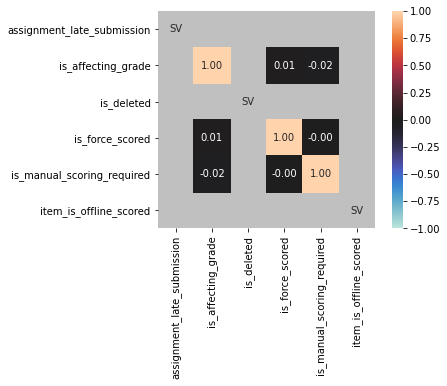

In [5]:
corr, ax = util.associations( filterDf.select(*types['binaryVars']).toPandas(), nan_replace_value='null' )

- No correlation
- Single (Unary) values
  - assignment_late_submission
  - is_deleted
  - item_is_offline_scored
  - will not be used


##### Categorical / Nominal and Binary Correlations Heatmap

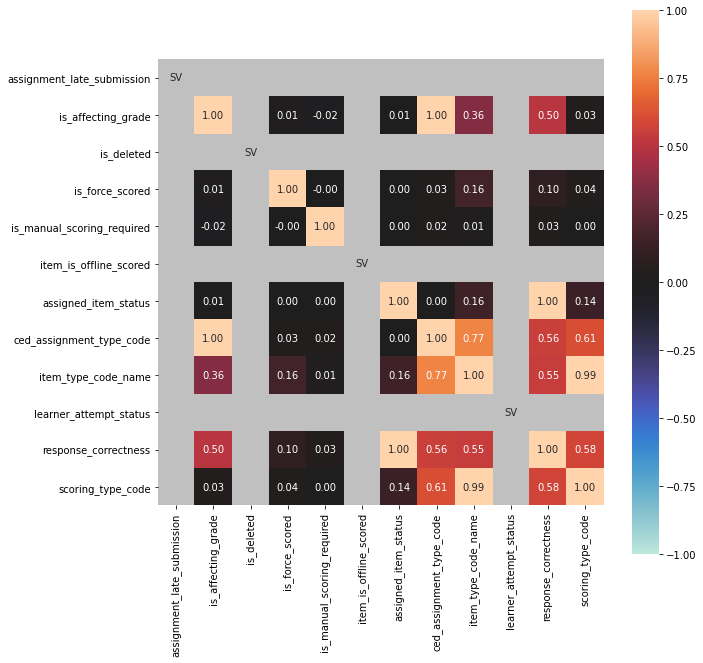

In [6]:
corr, ax = util.associations( filterDf.select(*types['binaryVars'], *types['nominalVars']).toPandas(), nan_replace_value='null', figsize=[10,10] )

- Correlations with binary variables
  - is_affecting_grade and ced_assignment_type_code

###### Display is_affecting_grade and ced_assignment_type_code Correlation

In [7]:
def grade_to_code():
  dfPd = filterDf.select('is_affecting_grade','ced_assignment_type_code').toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")

grade_to_code()

ced_assignment_type_code,assessment,clo,game,practice,rubric,Total
is_affecting_grade,,,,,,
False,0,0,0,1595,0,1595
True,61463,214,1555,0,11,63243
Total,61463,214,1555,1595,11,64838


- is_affecting_grade = false when ced_assignment_type_code = practice
